<a href="https://colab.research.google.com/github/taechanha/inverseDesignMetaMatl/blob/main/%5Br%5D_target_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################
###################### FROM HERE ######################

import numpy as np
import matplotlib.pyplot as plt

f = open("/content/dataset_2.txt", 'r')
data = []
length = 0
for i in f:
  new = []
  new.append(i)
  data.append(new)
  # length of dataset
  length += 1

f.close()

# create dataset from data
dataset = []
for i in range(length):
  new = []
  for j in data[i][0].split(','):
    new.append(float(j))
  dataset.append(new)

print("shape of dataset: ", np.array(dataset).shape)
edge_index = dataset

# trim out label from dataset
# Ex Ey Ez
label = []
new = []
for line in dataset:
  tmp = []
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.append(line.pop(-1))
  tmp.reverse()
  label.append(tmp)

print("label.shape: ", np.array(label).shape)

# figure out max length of index list
max = 0
for i in dataset:
    if max < np.sum(i):
        max = np.sum(i)
max = int(max)
print("max: ", max)

# create index list dataset
d_tmp = []
for i in dataset:
    tmp = []
    for e, j in enumerate(i):
        if j == 1:
            tmp.append(e+1)
    if len(tmp) < max:
        tmp += [0] * (max - len(tmp))
    d_tmp.append(tmp)
print("shape of idx_list: ", np.array(d_tmp).shape)
idx_list = d_tmp


# whole dataset to Tensor & train/test split
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

idx_list = torch.FloatTensor(idx_list)
label = torch.FloatTensor(label)

split = int(length * 0.8)

x_train = idx_list[:split]
y_train = label[:split]
x_val = idx_list[split:]
y_val = label[split:]

print("x_train, y_train, x_val shape: ", x_train.shape, y_train.shape, x_val.shape)

# create torch dataset
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, label, dataset, transform=None, target_transform=None):
        self.labels = label
        self.dataset = dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        label = self.labels[idx]
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

# create DataLoader
from torch.utils.data import DataLoader

training_data   = CustomDataset(label=y_train, dataset=x_train)
test_data       = CustomDataset(label=y_val, dataset=x_val)
train_loader    = DataLoader(training_data, batch_size=4, shuffle=True)
test_loader     = DataLoader(test_data, batch_size=4, shuffle=False)

shape of dataset:  (2000, 354)
label.shape:  (2000, 3)
max:  32
shape of idx_list:  (2000, 32)
x_train, y_train, x_val shape:  torch.Size([1600, 32]) torch.Size([1600, 3]) torch.Size([400, 32])


In [2]:
y_train.shape

torch.Size([1600, 3])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


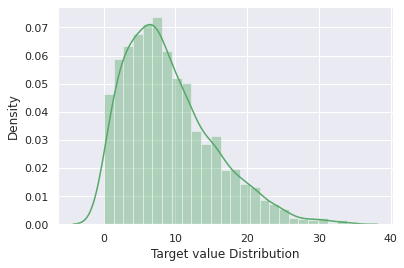

In [34]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 0], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


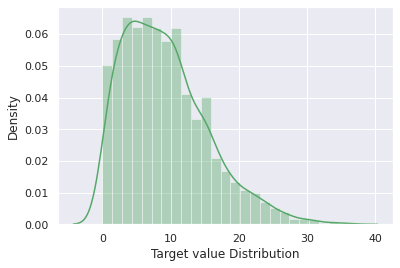

In [37]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 1], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


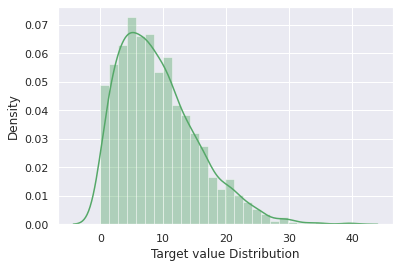

In [38]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#Organize Data
SR_y = pd.Series(y_train[:, 2], name="Target value Distribution")

#Plot Data
fig, ax = plt.subplots()
sns.distplot(SR_y, color="g", ax=ax)
plt.show()

In [25]:
# ℎ=2×IQR×𝑛−1/3 . So the number of bins is (max−min)/ℎ

In [24]:
q75, q25 = np.percentile(y_train[:, 0], [75 ,25])
iqr = q75 - q25
iqr

8.135164141654968

In [32]:
h = 2 * iqr * len(y_train) ** (-1/3)
max = torch.max(y_train[:, 0])
min = torch.min(y_train[:, 0])
nbin = int((max - min) / h)
nbin

24